# Predicting a hospital charge using machine learning
This project will create a model to forecast the treatment cost of a patient vs health metrics. We will explore the data to determine which factors correlate with an increased cost.

In [7]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import seaborn as sns


# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

# Assign random seed
np.random.seed(42)

In [8]:
# Import the training and validation set
df = pd.read_csv("insurance.csv")

# Checking for any missing data and datatypes
df.isna().sum(), df.dtypes

(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object)

In [9]:
# Encode categorical data to be binary
original_df = df
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [10]:
# Split data
X = df.drop("charges", axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8622165326195984

In [11]:
# Take the mean of 10-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(model, X, y, cv=10))

# Cross-validated score
print(f'The cross-validated score is: {clf_cross_val_score*100:.2f}%')

The cross-validated score is: 83.50%


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8622165326195984
MAE: 2555.684002643311
MSE: 21390708.531345494


In [13]:
# Save the model
pickle.dump(model, open("random_forst_model_1.pkl", "wb"))

In [14]:
# Creating an index dictionary for each column in the table to be inserted
cat = df.drop("charges", axis=1)
index_dict = dict(zip(cat.columns, range(cat.shape[1])))
index_dict

{'age': 0,
 'bmi': 1,
 'children': 2,
 'sex_female': 3,
 'sex_male': 4,
 'smoker_no': 5,
 'smoker_yes': 6,
 'region_northeast': 7,
 'region_northwest': 8,
 'region_southeast': 9,
 'region_southwest': 10}

In [15]:
# Exporting the index dictionary to be used with the flask webapp
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid, 2)

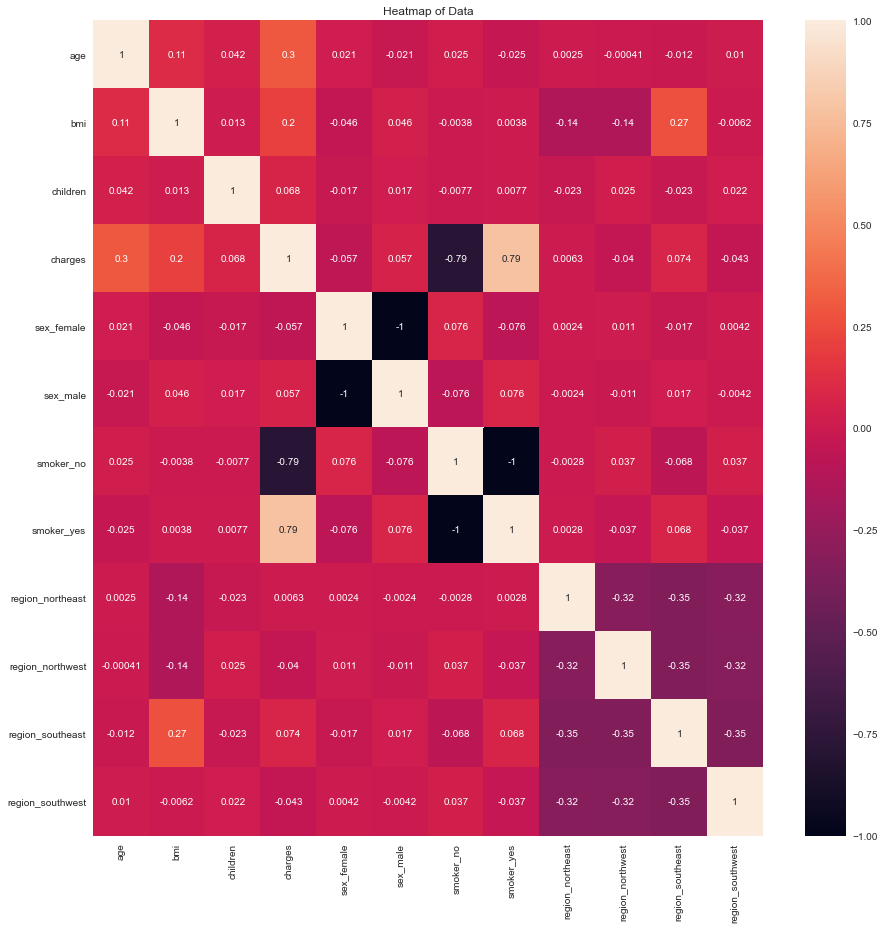

In [59]:
# Heatmap to show correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)
plt.title("Heatmap of Data")
plt.show()

Strongest correlation is shown between smoking and charges. The next two leading factors are age and then BMI.

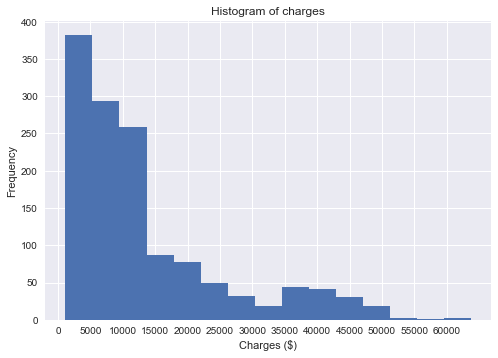

In [52]:
# A histogram showing the frequency of charges

plt.style.use("seaborn")
plt.hist(df["charges"], bins=15)
plt.xlabel("Charges ($)")
plt.ylabel("Frequency")
plt.title("Histogram of charges")
plt.xticks(np.arange(0, 65000, 5000))
plt.show()

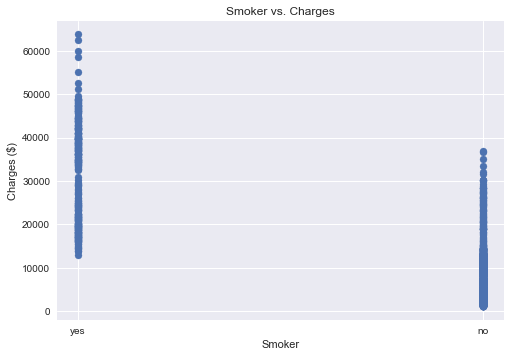

In [53]:
# Smoker vs. Charges

plt.style.use("seaborn")
plt.scatter(original_df["smoker"], original_df["charges"])
plt.xlabel("Smoker")
plt.ylabel("Charges ($)")
plt.title("Smoker vs. Charges")
plt.show()

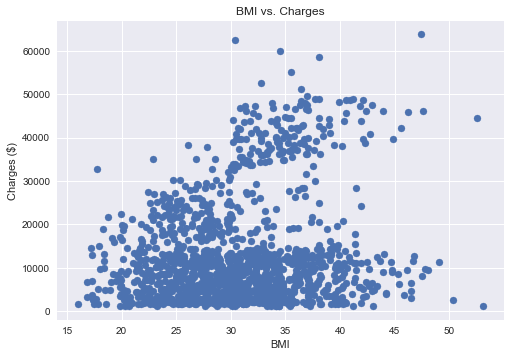

In [54]:
# BMI vs. Charges

plt.style.use("seaborn")
plt.scatter(df["bmi"], df["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.title("BMI vs. Charges")
plt.show()

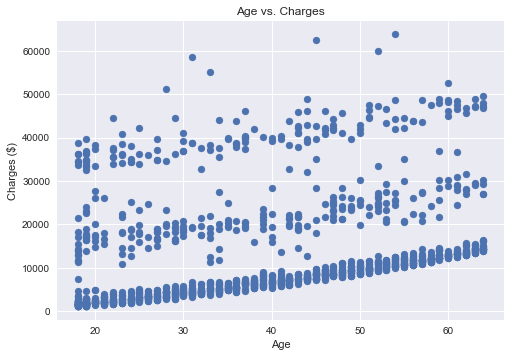

In [55]:
# Age vs. Charges

# BMI vs. Charges

plt.style.use("seaborn")
plt.scatter(df["age"], df["charges"])
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.title("Age vs. Charges")
plt.show()